# ID5059 Practical 1 Student ID 200028066

# 1. Frame the problem

<ol>
    <li> <b>Frame the problem</b> </li>
    <li> Get the data </li>
    <li> Explore the data </li>
    <li> Prepare the data </li>
    <li> Explore Models </li>
    <li> Fine-tune models </li>
    <li> Present solution </li>
    <li> Launch/maintain </li>
</ol>

Similarly, to the worked example in lectures 4 and 5 the label is a continuous variable hence we have a regression problem. This will determine the data preparation steps and the model selection.

# 2. Get the data

<ol>
    <li> Frame the problem </li>
    <li> <b>Get the data</b> </li>
    <li> Explore the data </li>
    <li> Prepare the data </li>
    <li> Explore Models </li>
    <li> Fine-tune models </li>
    <li> Present solution </li>
    <li> Launch/maintain </li>
</ol>

Firstly I import required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob as glob
import random as random
from sklearn.model_selection import cross_val_score

I used GitBash to split the rather large data file into 86 pieces with 300 000 lines each. Here is the command I used:

split -l300000 'filename'.

Using the 'glob' library and a 'for' loop to take random lines from all pieces dated up to 2016 as per the task and combine them in a dataset, which I will use for training. I experimented with different number of samples per file from 10 to 100 000 and I have to admitt the results were not great on either attempt, finally I decided to have 5500 random samples from each piece and this resulted in 418000 entries for training which I believe is enough, because when I tried with more than 1 million the RMSE results were even worse.  

I am using the same approach at the end of this notebook to create another Testing dataset by taking random lines from all the rest of the pieces dated 2017 and further.

I have put all pieces dated up to 2016 in a folder named 'Train' and the pieces dated on and after 2017 in a folder called 'Test'.

I am also naming the columns as they we unnamed in the raw data.

In [2]:
%%time
files = glob.glob('Full data file\Train/*.csv')
data1_l = []


for f in files: 
    n = sum(1 for line in open(f)) - 1
    s = 5500
    skip = sorted(random.sample(range(1,n+1),n-s))
    df = pd.read_csv(f, skiprows=skip,  header=0, names=['some1','price','date','pk','house_type','some2','lease_type','str_num','hou_name','street','town','city','city1','county','g','gg'])
    data1_l.append(df)
#    if counter>1:
#        data1_l.append(df)
#    else:
#        data1 = df

data1 = pd.concat(data1_l)

Wall time: 1min 51s


# 3. Explore the data (exploratory data analysis)

<ol>
    <li> Frame the problem </li>
    <li> Get the data </li>
    <li> <b>Explore the data</b> </li>
    <li> Prepare the data </li>
    <li> Explore Models </li>
    <li> Fine-tune models </li>
    <li> Present solution </li>
    <li> Launch/maintain </li>
</ol>

Using the .info and .head methods I am having a first look on the data, 
how many features we have, what are their data types etc.
I have to say I am really impressed how cheap were properties in the UK in the past and how expensive they are now, especially in sought after areas.

In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418000 entries, 0 to 5499
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   some1       418000 non-null  object
 1   price       418000 non-null  int64 
 2   date        418000 non-null  object
 3   pk          417561 non-null  object
 4   house_type  418000 non-null  object
 5   some2       418000 non-null  object
 6   lease_type  418000 non-null  object
 7   str_num     417927 non-null  object
 8   hou_name    47805 non-null   object
 9   street      411696 non-null  object
 10  town        295348 non-null  object
 11  city        418000 non-null  object
 12  city1       418000 non-null  object
 13  county      418000 non-null  object
 14  g           418000 non-null  object
 15  gg          418000 non-null  object
dtypes: int64(1), object(15)
memory usage: 30.3+ MB


In [4]:
data1.head(5)

,some1,price,date,pk,house_type,some2,lease_type,str_num,hou_name,street,town,city,city1,county,g,gg
0,{7648EFE5-67A0-4728-B5DE-42C565DA1D28},89995,1995-06-30 00:00,WF6 2TT,D,Y,F,8,NaN,SHAW AVENUE,NORMANTON,NORMANTON,WAKEFIELD,WEST YORKSHIRE,A,A
1,{94121F47-CBC8-45EB-A5A1-42C623B46695},46000,1995-11-30 00:00,CW2 8AN,S,N,F,46,NaN,WOODSIDE AVENUE,WISTASTON,CREWE,CREWE AND NANTWICH,CHESHIRE,A,A
2,{E86A287C-110C-4628-BAFD-49E3C4860C37},27500,1995-06-30 00:00,MK42 9NQ,T,N,F,41,NaN,REDWOOD GROVE,BEDFORD,BEDFORD,NORTH BEDFORDSHIRE,BEDFORDSHIRE,A,A
3,{31B400E7-B6F1-4A20-A9B5-465401B530B9},25000,1995-10-05 00:00,HD7 5NG,T,N,F,32,NaN,HOYLEHOUSE FOLD,LINTHWAITE,HUDDERSFIELD,KIRKLEES,WEST YORKSHIRE,A,A
4,{C4523837-9746-488B-8CCF-83B5C7C0B271},142000,1995-01-27 00:00,RG20 8XB,D,N,F,HOMESTEAD,NaN,GREEN LANE,CHIEVELEY,NEWBURY,NEWBURY,BERKSHIRE,A,A


# 3. Explore the data (exploratory data analysis)

<ol>
    <li> Frame the problem </li>
    <li> Get the data </li>
    <li> Explore the data </li>
    <li> <b>Prepare the data</b> </li>
    <li> Explore Models </li>
    <li> Fine-tune models </li>
    <li> Present solution </li>
    <li> Launch/maintain </li>
</ol>
As specified in the task I will only use city, house type and lease type to predict the price, hence I am dropping all the other unnecessary columns. Also displaying the result, so I can inspect it and see the year:

In [5]:
data1.drop(['some1', 'pk', 'some2',
       'str_num', 'hou_name', 'street', 'town', 'city1', 'county', 'g',
       'gg'], axis=1, inplace=True)
data1.head(5)

,price,date,house_type,lease_type,city
0,89995,1995-06-30 00:00,D,F,NORMANTON
1,46000,1995-11-30 00:00,S,F,CREWE
2,27500,1995-06-30 00:00,T,F,BEDFORD
3,25000,1995-10-05 00:00,T,F,HUDDERSFIELD
4,142000,1995-01-27 00:00,D,F,NEWBURY


A quick check to make sure I have data from different years, below.

In [6]:
print(data1['date'].value_counts())

2016-03-31 00:00    613
2002-06-28 00:00    515
2002-05-31 00:00    506
2006-06-30 00:00    496
2001-06-29 00:00    477
                   ... 
2003-06-08 00:00      1
1998-09-20 00:00      1
2004-09-04 00:00      1
2013-10-13 00:00      1
1999-01-23 00:00      1
Name: date, Length: 6819, dtype: int64


After I have seen the year, I can drop it as well and leave only the columns specified in the task.

In [7]:
data1.drop(['date'], axis=1, inplace=True)
data1.head(5)

,price,house_type,lease_type,city
0,89995,D,F,NORMANTON
1,46000,S,F,CREWE
2,27500,T,F,BEDFORD
3,25000,T,F,HUDDERSFIELD
4,142000,D,F,NEWBURY


I check the remaining columns' data types and also for any null values.

In [42]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418000 entries, 0 to 5499
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   price       418000 non-null  int64 
 1   house_type  418000 non-null  object
 2   lease_type  418000 non-null  object
 3   city        418000 non-null  object
dtypes: int64(1), object(3)
memory usage: 11.2+ MB


For the regression models that I will use I need only numerical feature values, preferably between -1 and 1. I achieve that by using pandas get_dummies for house type and lease type columns. Similarly to OneHotEncoder this turns house type into two columns - if it is a freehold property we have '1' in the 'lease_type_F' column and '0' on the other one 'lease_type_L', or vice versa if the property is a leasehold. The same is done for the house type, but with more columns to reflect all the types in the data. Also displaying a sample of the updated table to inspect the results.

In [8]:
data1_oneho = data1.copy()
data1_oneho = pd.get_dummies(data1_oneho, columns=['lease_type'], prefix = ['lease_type'])
data1_oneho = pd.get_dummies(data1_oneho, columns=['house_type'], prefix = ['house_type'])
data1_oneho.head(5)

,price,city,lease_type_F,lease_type_L,lease_type_U,house_type_D,house_type_F,house_type_O,house_type_S,house_type_T
0,89995,NORMANTON,1,0,0,1,0,0,0,0
1,46000,CREWE,1,0,0,0,0,0,1,0
2,27500,BEDFORD,1,0,0,0,0,0,0,1
3,25000,HUDDERSFIELD,1,0,0,0,0,0,0,1
4,142000,NEWBURY,1,0,0,1,0,0,0,0


In [9]:
data1_oneho.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418000 entries, 0 to 5499
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         418000 non-null  int64 
 1   city          418000 non-null  object
 2   lease_type_F  418000 non-null  uint8 
 3   lease_type_L  418000 non-null  uint8 
 4   lease_type_U  418000 non-null  uint8 
 5   house_type_D  418000 non-null  uint8 
 6   house_type_F  418000 non-null  uint8 
 7   house_type_O  418000 non-null  uint8 
 8   house_type_S  418000 non-null  uint8 
 9   house_type_T  418000 non-null  uint8 
dtypes: int64(1), object(1), uint8(8)
memory usage: 11.2+ MB


In [10]:
print(data1_oneho['city'].value_counts())

LONDON              33012
MANCHESTER           6864
BRISTOL              6268
BIRMINGHAM           6162
NOTTINGHAM           5431
                    ...  
TALSARNAU               1
NEWCASTLETON            1
RAVENGLASS              1
HINTON ST GEORGE        1
BRYNTEG                 1
Name: city, Length: 1161, dtype: int64


After checking the data again, I can see that the only object left is the city column. As per specification I only need it to indicate if the property is located in London or not. I decided to transform the values in this column to 1 if it is London or to 0 for any other location.

In [11]:
data1_oneho.loc[data1_oneho['city'] == 'LONDON', ['city']] = 1
data1_oneho.loc[data1_oneho['city'] != 1, ['city']] = 0
data1_oneho['city'].value_counts()

0    384988
1     33012
Name: city, dtype: int64

Now I have only two values in the city column 1 for London and 0 for anything else. In order to make it easier for some models to train on the data, I will split this column in two - if the property is in London there will be '1' in the one column and '0' in the other, and vice versa. Just like I did for the house and lease types.

In [12]:
data1_oneho = pd.get_dummies(data1_oneho, columns=['city'], prefix = ['city'])
data1_oneho.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418000 entries, 0 to 5499
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   price         418000 non-null  int64
 1   lease_type_F  418000 non-null  uint8
 2   lease_type_L  418000 non-null  uint8
 3   lease_type_U  418000 non-null  uint8
 4   house_type_D  418000 non-null  uint8
 5   house_type_F  418000 non-null  uint8
 6   house_type_O  418000 non-null  uint8
 7   house_type_S  418000 non-null  uint8
 8   house_type_T  418000 non-null  uint8
 9   city_0        418000 non-null  uint8
 10  city_1        418000 non-null  uint8
dtypes: int64(1), uint8(10)
memory usage: 10.4 MB


In [13]:
print(data1_oneho['price'].value_counts())

250000    4673
125000    3947
120000    3581
60000     3173
110000    3160
          ... 
193332       1
476034       1
183347       1
89153        1
36846        1
Name: price, Length: 13699, dtype: int64


Now as in the lectures I will try to produce some visualisations in order to get better understanding on the data. I also tried that in another application called Tableau Desktop, which we use for another module CS5044.

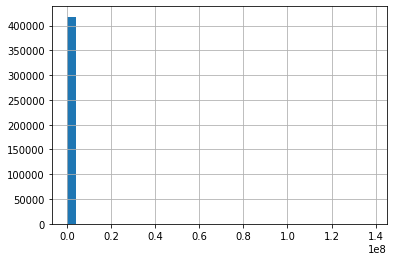

In [15]:
data1_oneho['price'].hist(bins=33)
plt.show()

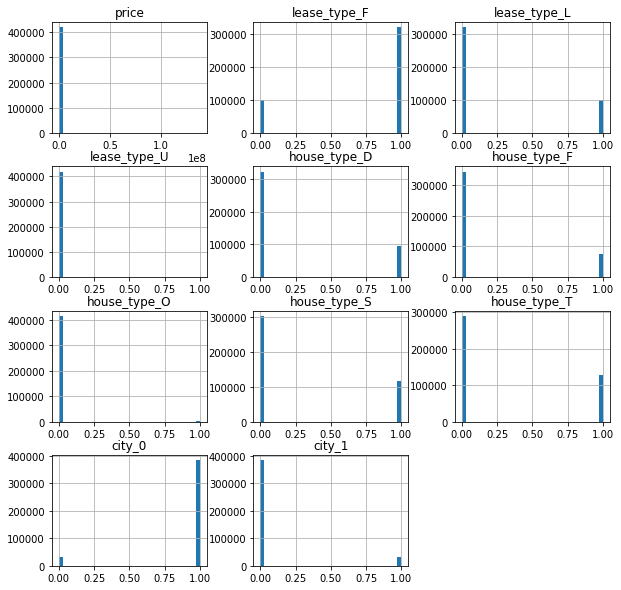

In [16]:
data1_oneho.hist(bins=35,figsize=(10,10))
plt.show()

Using the 'corr' method to calculate a correlation matrix and find out which features/columns are linearly correlated with our label 'price'. If the number is positive the price grows when the feature grows, if the number is negative the price decreases when the feature grows.

In [14]:
data1_onehoR = data1_oneho.corr()

In [15]:
data1_onehoR.head(len(data1_onehoR))

,price,lease_type_F,lease_type_L,lease_type_U,house_type_D,house_type_F,house_type_O,house_type_S,house_type_T,city_0,city_1
price,1.000000,0.013450,-0.013450,-0.000030,0.075050,-0.004402,0.175091,-0.037655,-0.055361,-0.113833,0.113833
lease_type_F,0.013450,1.000000,-0.999927,-0.009215,0.255452,-0.817277,-0.002255,0.232289,0.225040,0.276392,-0.276392
lease_type_L,-0.013450,-0.999927,1.000000,-0.002856,-0.255495,0.817294,0.002259,-0.232273,-0.225032,-0.276379,0.276379
lease_type_U,-0.000030,-0.009215,-0.002856,1.000000,0.002725,0.001213,-0.000366,-0.002124,-0.001389,-0.001956,0.001956
house_type_D,0.075050,0.255452,-0.255495,0.002725,1.000000,-0.257960,-0.039101,-0.338124,-0.364191,0.147038,-0.147038
house_type_F,-0.004402,-0.817277,0.817294,0.001213,-0.257960,1.000000,-0.033631,-0.290821,-0.313242,-0.336096,0.336096
house_type_O,0.175091,-0.002255,0.002259,-0.000366,-0.039101,-0.033631,1.000000,-0.044082,-0.047480,-0.005441,0.005441
house_type_S,-0.037655,0.232289,-0.232273,-0.002124,-0.338124,-0.290821,-0.044082,1.000000,-0.410586,0.130154,-0.130154
house_type_T,-0.055361,0.225040,-0.225032,-0.001389,-0.364191,-0.313242,-0.047480,-0.410586,1.000000,0.021307,-0.021307
city_0,-0.113833,0.276392,-0.276379,-0.001956,0.147038,-0.336096,-0.005441,0.130154,0.021307,1.000000,-1.000000


Now I isolate the correlations for 'price' as this is the only one of interest.

In [16]:
data1_onehoR["price"].sort_values(ascending=False)

price           1.000000
house_type_O    0.175091
city_1          0.113833
house_type_D    0.075050
lease_type_F    0.013450
lease_type_U   -0.000030
house_type_F   -0.004402
lease_type_L   -0.013450
house_type_S   -0.037655
house_type_T   -0.055361
city_0         -0.113833
Name: price, dtype: float64

Looks like the 'house_type_O' or 'House Type Other' has the strongest positive linear correlation with my target/label (price), followed by City_1 (the property being in the London area), and finally the third most meaningfull positive correlation is Detached property. The only significant negative correlation is 'city_0' - it makes perfect sense for a property to be cheaper if is outside the London area.

All these make sense because if a property is in London and/or it is detached these of course make it much dearer.

That OTHER house type also makes sense because I presume it means that the property is a mansion, a period Victorian, Georgian or other historically significant home. It also might be a National Trust property like Charlecote Mansion or one of those lovely, thatched roof cottages in the Cotswolds area. Places such as Chipping Campden, Broad Campden, Broadway, Aston Magna and Blockley have some great examples of these picturesque, cosy cottages where Cotswolds limestone is combined with thatched roofs and complimented with colourful gardens and I think those places are priceless really.

After the discussion during the lab session and the advice that such outliers matter, I decided not to drop this column (house_type_O) because these are real prices and not type errors so the need to be in the model as well. Well, just in case I did try to train the models without it but the results were not any better so in the end I left it in.


In [17]:
print(data1_oneho['house_type_O'].value_counts())

0    415880
1      2120
Name: house_type_O, dtype: int64


Final check - no null values and all datatypes are numerical. I can proceed to choosing models and training them. I am not splitting, because my whole training data frame consists of the random samples of all pieces of the original datafile dated up to 2016. 
Later on when I am creating a data frame for testing I will use the same function to join random samples from all the remaining pieces dated 2017 and onwards.

In [19]:
data1_oneho.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418000 entries, 0 to 5499
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   price         418000 non-null  int64
 1   lease_type_F  418000 non-null  uint8
 2   lease_type_L  418000 non-null  uint8
 3   lease_type_U  418000 non-null  uint8
 4   house_type_D  418000 non-null  uint8
 5   house_type_F  418000 non-null  uint8
 6   house_type_O  418000 non-null  uint8
 7   house_type_S  418000 non-null  uint8
 8   house_type_T  418000 non-null  uint8
 9   city_0        418000 non-null  uint8
 10  city_1        418000 non-null  uint8
dtypes: int64(1), uint8(10)
memory usage: 10.4 MB


I will not need to scale the data because all the features are either 0s or 1s, only the lables are large numbers but they do not need to be scaled as far as I understood. Nevertheless I experimented with the StandardScaler() just to see how it workds, I am leaving the code here:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data1_oneho_scaled = scaler.fit_transform(data1_oneho)

dfr = pd.DataFrame(data1_oneho_scaled)

# Split data into labels and features or X and y.

By using dfr I mean 'dataframe ready'.

In [20]:
dfr = data1_oneho.copy()
dfr_labels = dfr["price"].copy()
dfr.drop("price",axis=1,inplace=True)

I also tried scaling the data but it worsened the results hence I am leaving the code as comment.

## Our ML checklist

<ol>
    <li> Frame the problem </li>
    <li> Get the data </li>
    <li> Explore the data </li>
    <li> Prepare the data </li>
    <li> <b>Explore Models</b> </li>
    <li> Fine-tune models </li>
    <li> Present solution </li>
    <li> Launch/maintain </li>
</ol>

# Linear regression model attempt

First I am calling the model and fitting the prepared dataframe and the labels (labels is the 'price column that should be predicted later on during testing).

In [21]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(dfr, dfr_labels)

LinearRegression()

Looking at a snippet of 19 predictions compared with 19 actual corresponding labels (house prices):

In [22]:
some_data = dfr.iloc[:19]
some_labels = dfr_labels.iloc[:19]
some_data_prepared = some_data
some_predictions = lin_reg.predict(some_data_prepared).round()

print("Predictions:", some_predictions)
print("Labels:", list(some_labels))

Predictions: [252898. 147992. 124576. 124576. 252898. 252898. 146249. 404390. 147992.
 252898. 124576. 124576. 406134. 147992. 252898. 252898. 363760.  83946.
 124576.]
Labels: [89995, 46000, 27500, 25000, 142000, 102000, 29000, 147000, 59245, 77000, 37000, 41500, 80000, 48000, 63000, 78000, 160000, 20000, 41250]


Root mean square error calculation for the Linear regression model

In [23]:
from sklearn.metrics import mean_squared_error

dfr_pred = lin_reg.predict(dfr)
lin_mse = mean_squared_error(dfr_labels, dfr_pred)
lin_rmse = np.sqrt(lin_mse)
np.round(lin_rmse)

504424.0

In [24]:
dfr_labels.median()

132000.0

RMSE is 504424 with the median house price being 127000. This is far from great accuracy unfortunately, but I could not improve it no matter what I tried. The lowest RMSE I achieved was around 53000 but it only happened when I was using just the piece from 1995 provided on Moodle with the practical and I could not go with that because I needed homogenous data from all years. 

<b>Cross-validation to try to improve predictions.</b>

In my understanding CV splits the data into K folds, then trains the model using 9 folds as training data and 1 fold as testing data,
doing K iterations until each fold has been used as test data. I tried different K values and finally decided to go with 150 folds.

In [25]:
def display_scores(scores):
    print("Scores:", np.round(scores))
    print("Mean:", np.round(scores.mean()))
    print("Standard deviation:", np.round(scores.std()))

In [26]:
%%time
    
lin_scores = cross_val_score(lin_reg, dfr, dfr_labels,
                             scoring="neg_mean_squared_error", cv=150)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 136680.  129691.  127570.  158391.  130589.  144025.  129863.  151193.
  125352.  130042.  135178.  128173.  124008.  126887.  141357.  135128.
  134898.  122665.  124601.  121710.  121906.  125082.  127114.  126262.
  130217.  189660.  127134.  123171.  125841.  149713.  119392.  116094.
  119228.  129927.  113090.  129311.  140564.  120223.  127311.  124119.
  118219.  124300.  125233.  146208.  170589.  116019.  140798.  118334.
  129468.  105377.  105857.  113951.  151397.  125555.  116418.  106792.
  117657.  126498.  111890.  106505.  114717.  119768.  109420.  114731.
  130750.  114006.  124840.  132194.  135129.  129977.  151730.  139143.
  142949.  116027.  133312.  140028.  130130.  130750.  128035.  124420.
  133573.  173966.  143805.  132786.  151887.  173173.  176293.  153651.
  147598.  134900.  192257.  213635.  149549.  158049.  170188.  147615.
  186878.  197130.  176845.  192133.  207873.  245809.  204225.  196142.
  300643.  174209.  169319.  270465.  20323

A RMSE mean of 280793 looks much better, although it is still far off the mark. As in the lectures I will train some more models and compare the results.

# Decision Tree Regressor...second model attempt

Again, calling the next model and fitting the data features and labels, then using the same code as above to have the RMSE calculated.

In [55]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=379)
tree_reg.fit(dfr, dfr_labels)

DecisionTreeRegressor(random_state=379)

In [56]:
dfr_predi = tree_reg.predict(dfr)
tree_mse = mean_squared_error(dfr_labels, dfr_predi)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

497417.7594100365

Again the results are not great. I will try and see if cross-validation improves that.

# Cross-validation on Decision Tree Regressor

In [31]:
%%time
from sklearn.model_selection import cross_val_score

K = 150

scores = cross_val_score(tree_reg, dfr, dfr_labels,
                         scoring="neg_mean_squared_error", cv=K)
tree_rmse_scores = np.sqrt(-scores)

Wall time: 40.9 s


I am using the function provided in Lecture 5 to display the scores for each iteration, plus the mean score and standard deviation. I repeated this process many times increasing the folds each time and observing slightly lower RMSE every time. I stopped at K=150.

In [32]:
display_scores(tree_rmse_scores)

Scores: [ 134915.  128306.  128908.  154731.  129683.  141091.  129009.  145257.
  124133.  130206.  134081.  128614.  126376.  127710.  136979.  131759.
  134341.  122674.  124008.  121385.  121246.  125748.  125475.  124456.
  126795.  183550.  126247.  123514.  122406.  148103.  118740.  115367.
  117282.  128517.  112048.  126747.  136572.  118246.  125892.  122815.
  117171.  124699.  123358.  143944.  164955.  113938.  140035.  116549.
  126105.  102873.  102406.  111197.  149840.  124441.  113890.  106229.
  114710.  124309.  112278.  104991.  113780.  117977.  108139.  113786.
  128229.  112779.  123417.  130153.  133951.  127907.  148001.  133371.
  137924.  113764.  132554.  138641.  129471.  127972.  126199.  120658.
  133002.  171886.  142286.  129710.  150445.  167852.  181996.  151099.
  145504.  132556.  188153.  212398.  146717.  157494.  168612.  144262.
  186517.  194984.  175326.  191702.  203909.  244963.  205039.  191736.
  300509.  171172.  168045.  270590.  20224

A RMSE mean of 279902 is slightly better than the first used model - Linear Regression (least squares) with the same number of CV folds K = 150.

# Random Forest Regressor  3rd model attempt

As in the lectures I will time this operation because it is computationally intensive and I am curious to see how my laptop performs compared to the lecturer's machine.
I am calling the model, specifying the number of estimators to 100 as in the lectures, also chosing a random number which I like. Then I am fitting the data and lables as on previous models. Finally I am adding the already used code for RMSE calculation.

In [33]:
%%time
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=379)
forest_reg.fit(dfr, dfr_labels)

dfr_predi = forest_reg.predict(dfr)
forest_mse = mean_squared_error(dfr_labels, dfr_predi)
forest_rmse = np.sqrt(forest_mse)
forest_rmse.round()

Wall time: 21.8 s


497434.0

# Same model, but run through cross-validation

150 folds was taking too long with this mdoel hence I did it with 35. The result 52448 is slightly worse than the previous model.

In [34]:
%%time
forest_scores = cross_val_score(forest_reg, dfr, dfr_labels,
                                scoring="neg_mean_squared_error", cv=35)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [ 139584.  137466.  132115.  134648.  123915.  143804.  131838.  121079.
  127154.  122594.  140336.  112677.  125506.  112878.  115502.  124545.
  131053.  135842.  124377.  152094.  159317.  179139.  177585.  207854.
  230971.  208031.  209304.  220736.  259092. 1165754. 1019159.  498897.
 1603268.  816730. 1470013.]
Mean: 314710.0
Standard deviation: 389294.0
Wall time: 10min 36s


I did another attempt to see if the mean will be similar with less folds cv=5, but the RMSE was a lot higher around 375000 hence I will keep this CV even though it took more than 9 minutes.

I attempted several more complex models such as ElasticNet, ElasticNetCV, Stochastic Gradient Descent, and Mini Batch Gradient Descent but their predictions were too far off the mark, some being negative numbers and I could not improve their performance anyhow, hence I am not including this part of my attempts in this notebook. 

So far, the lowest RMSE of 219597 came from the second model, Decision Tree Regressor, after 150 fold cross validation. I will try to fine-tune it and see if it gets any better.

# Fine-tune models

<ol>
    <li> Frame the problem </li>
    <li> Get the data </li>
    <li> Explore the data </li>
    <li> Prepare the data </li>
    <li> Explore Models </li>
    <li> <b>Fine-tune models</b> </li>
    <li> Present solution </li>
    <li> Launch/maintain </li>
</ol>

# Fine tuning on Decison Tree Regressor

Once I have chosen a relatively well performing model I am moving to fine-tuning using 'GridSearchCV'. This is similar to cross validation, but it iteratively trains the model with different combinations of its parameters.
My best model so far is the cross-validated Decission Tree Regressor.
In the lectures another model was fine-tuned hence I had to read some of the SK Learn documentation and find out what the parameters of my best model are. Once I did that, I chose some parameters to use for fine tuning and changed the code from lectures as follows.

In [36]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid = [
    
    { 'criterion': ["friedman_mse"] , 'min_samples_split': [15], 'max_features': [4, 6, 8, 10]},
    
    {'criterion': ["mse"], 'min_samples_split': [5], 'max_features': [4,6,8,10]},
  ]

tree_reg = DecisionTreeRegressor(random_state=379)

grid_search = GridSearchCV(tree_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(dfr, dfr_labels)

Wall time: 9.73 s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=379),
             param_grid=[{'criterion': ['friedman_mse'],
                          'max_features': [4, 6, 8, 10],
                          'min_samples_split': [15]},
                         {'criterion': ['mse'], 'max_features': [4, 6, 8, 10],
                          'min_samples_split': [5]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [37]:
grid_search.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_features=6,
                      min_samples_split=15, random_state=379)

In [38]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.round(np.sqrt(-mean_score)), params)

513963.0 {'criterion': 'friedman_mse', 'max_features': 4, 'min_samples_split': 15}
513784.0 {'criterion': 'friedman_mse', 'max_features': 6, 'min_samples_split': 15}
513972.0 {'criterion': 'friedman_mse', 'max_features': 8, 'min_samples_split': 15}
513974.0 {'criterion': 'friedman_mse', 'max_features': 10, 'min_samples_split': 15}
513963.0 {'criterion': 'mse', 'max_features': 4, 'min_samples_split': 5}
513784.0 {'criterion': 'mse', 'max_features': 6, 'min_samples_split': 5}
514050.0 {'criterion': 'mse', 'max_features': 8, 'min_samples_split': 5}
514778.0 {'criterion': 'mse', 'max_features': 10, 'min_samples_split': 5}


The scores are actually much worse than before hence I will continue without fine-tuning.
Just in case I decided to use the code from the lectures and see how fine-tuning will improve the Random Tree Regressor RMSE results.

# Fine tuning on Random Tree Regressor

I left the numbers of estimators the same as in the lectures but changed the features to 4,6,8,10 because I have 10 features in my dataset.

In [39]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [4, 6, 8, 10]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=379)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(dfr, dfr_labels)

Wall time: 2min 28s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=379),
             param_grid=[{'max_features': [4, 6, 8, 10],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [40]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=2, n_estimators=10,
                      random_state=379)

The best one uses 2 features and 10 estimators. I left the number of folds to cv=5, because any more than than took too long to compute. Below we can see the scores for all variations and analyse/compare them, althought we already know which is the best one.

In [41]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.round(np.sqrt(-mean_score)), params)

524756.0 {'max_features': 4, 'n_estimators': 3}
518915.0 {'max_features': 4, 'n_estimators': 10}
514516.0 {'max_features': 4, 'n_estimators': 30}
524246.0 {'max_features': 6, 'n_estimators': 3}
518944.0 {'max_features': 6, 'n_estimators': 10}
514814.0 {'max_features': 6, 'n_estimators': 30}
524507.0 {'max_features': 8, 'n_estimators': 3}
518858.0 {'max_features': 8, 'n_estimators': 10}
515135.0 {'max_features': 8, 'n_estimators': 30}
524771.0 {'max_features': 10, 'n_estimators': 3}
519121.0 {'max_features': 10, 'n_estimators': 10}
515314.0 {'max_features': 10, 'n_estimators': 30}
512927.0 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
512884.0 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
513514.0 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
514021.0 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
513013.0 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
513704.0 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


All in all the fine-tuning did not yeild any significat improvement in my case, but I did try it nonetheless and now I know how to search models in the SK Learn documentation, read about their parameters and experiment with different fine-tunning combinations.
I will try Stochastic Gradient Descent Regressor before I continue with trying the best model so far on the test data.

# SGDRegressor attempt

I used the SK Learn documentation and tried to train and predict with this model but the RMSE is a massive number so I presume I did something wrong.

In [89]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = dfr_labels
X = dfr
# Always scale the input. The most convenient way is to use a pipeline.
reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=500, tol=1e-3))
reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(max_iter=500))])

In [90]:
reg.predict(X)

array([-5866570.51421572, -8685273.21999322, -8685273.21999322, ...,
        6632441.28911521,  3663051.10537929, -8685273.21999322])

In [91]:
from sklearn.metrics import mean_squared_error

dfr_pred = reg.predict(X)
lin_mse = mean_squared_error(dfr_labels, dfr_pred)
lin_rmse = np.sqrt(lin_mse)
np.round(lin_rmse)

5530750622.0

# Run the best model on the test set, in my case a data frame made of concatenated subsamples from the original big data file, but dated 2017 or thereafter

First I am creating a test data frame as in the beginning I use my sampling function to take 5500 samples from each piece dated on or after 2017.

In [43]:
%%time
files = glob.glob('Full data file\Test/*.csv')
test_data_l = []


for f in files: 
    n = sum(1 for line in open(f)) - 1
    s = 5500
    skip = sorted(random.sample(range(1,n+1),n-s))
    df = pd.read_csv(f, skiprows=skip,  header=0, names=['some1','price','date','pk','house_type','some2','lease_type','str_num','hou_name','street','town','city','city1','county','g','gg'])
    test_data_l.append(df)
#    if counter>1:
#        data1_l.append(df)
#    else:
#        data1 = df

test_data = pd.concat(test_data_l)

Wall time: 14.6 s


Then I am applying exactly the same preparatory actions as I did for the training data. I tried to save those steps in a pipeline but I could not manage hence I will have to do them manually.

In [44]:
test_data.drop(['some1', 'pk', 'some2', 'str_num', 'hou_name', 'street', 'town', 'city1', 'county', 'g', 'gg'], axis=1, inplace=True)
test_data.head(5)

,price,date,house_type,lease_type,city
0,257500,2017-07-07 00:00,S,F,CARDIFF
1,245000,2017-06-30 00:00,S,F,WREXHAM
2,75000,2017-06-16 00:00,T,F,MERTHYR TYDFIL
3,259950,2017-05-26 00:00,D,F,PONTYPRIDD
4,685000,2017-10-10 00:00,S,F,LONDON


In [45]:
test_data.drop(['date'], axis=1, inplace=True)
test_data.head(5)

,price,house_type,lease_type,city
0,257500,S,F,CARDIFF
1,245000,S,F,WREXHAM
2,75000,T,F,MERTHYR TYDFIL
3,259950,D,F,PONTYPRIDD
4,685000,S,F,LONDON


In [46]:
test_data_oneho = test_data.copy()
test_data_oneho = pd.get_dummies(test_data_oneho, columns=['lease_type'], prefix = ['lease_type'])
test_data_oneho = pd.get_dummies(test_data_oneho, columns=['house_type'], prefix = ['house_type'])
test_data_oneho.head(5)
test_data_oneho.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55000 entries, 0 to 5499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         55000 non-null  int64 
 1   city          55000 non-null  object
 2   lease_type_F  55000 non-null  uint8 
 3   lease_type_L  55000 non-null  uint8 
 4   house_type_D  55000 non-null  uint8 
 5   house_type_F  55000 non-null  uint8 
 6   house_type_O  55000 non-null  uint8 
 7   house_type_S  55000 non-null  uint8 
 8   house_type_T  55000 non-null  uint8 
dtypes: int64(1), object(1), uint8(7)
memory usage: 1.4+ MB


In [47]:
test_data_oneho.loc[test_data_oneho['city'] == 'LONDON', ['city']] = 1
test_data_oneho.loc[test_data_oneho['city'] != 1, ['city']] = 0
print(test_data_oneho['city'].value_counts())
test_data_oneho.info()

0    51430
1     3570
Name: city, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 55000 entries, 0 to 5499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         55000 non-null  int64 
 1   city          55000 non-null  object
 2   lease_type_F  55000 non-null  uint8 
 3   lease_type_L  55000 non-null  uint8 
 4   house_type_D  55000 non-null  uint8 
 5   house_type_F  55000 non-null  uint8 
 6   house_type_O  55000 non-null  uint8 
 7   house_type_S  55000 non-null  uint8 
 8   house_type_T  55000 non-null  uint8 
dtypes: int64(1), object(1), uint8(7)
memory usage: 1.4+ MB


In [48]:
test_data_oneho = pd.get_dummies(test_data_oneho, columns=['city'], prefix = ['city'])
test_data_oneho.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55000 entries, 0 to 5499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   price         55000 non-null  int64
 1   lease_type_F  55000 non-null  uint8
 2   lease_type_L  55000 non-null  uint8
 3   house_type_D  55000 non-null  uint8
 4   house_type_F  55000 non-null  uint8
 5   house_type_O  55000 non-null  uint8
 6   house_type_S  55000 non-null  uint8
 7   house_type_T  55000 non-null  uint8
 8   city_0        55000 non-null  uint8
 9   city_1        55000 non-null  uint8
dtypes: int64(1), uint8(9)
memory usage: 1.3 MB


<b> I found something important: The data from older years has a column which is missing in the more recent data. In order to be able to use the models I trained I need to add this column to the test data as it is more recent. If this is not done some models returns an error as the number of features is different. Hence I am inserting this column on the exact position where it should be (same as in the older data) and defining a 0 value as there will be a 1 in one of the other two lease types.</b>

In [49]:
test_data_oneho.insert(3,'lease_type_U', 0)
test_data_oneho.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55000 entries, 0 to 5499
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   price         55000 non-null  int64
 1   lease_type_F  55000 non-null  uint8
 2   lease_type_L  55000 non-null  uint8
 3   lease_type_U  55000 non-null  int64
 4   house_type_D  55000 non-null  uint8
 5   house_type_F  55000 non-null  uint8
 6   house_type_O  55000 non-null  uint8
 7   house_type_S  55000 non-null  uint8
 8   house_type_T  55000 non-null  uint8
 9   city_0        55000 non-null  uint8
 10  city_1        55000 non-null  uint8
dtypes: int64(2), uint8(9)
memory usage: 1.7 MB


# Splitting the test data into X and y

In [50]:
td_ready = test_data_oneho.copy()   #td.ready will be the test data se
td_ready_labels = td_ready["price"].copy() #td_ready_labels are the test data labels, in other words the targets to be predicted
td_ready.drop("price",axis=1,inplace=True) # hence I am dropping this column, in order to hide the target and see how will the model do

In [51]:
td_ready.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55000 entries, 0 to 5499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   lease_type_F  55000 non-null  uint8
 1   lease_type_L  55000 non-null  uint8
 2   lease_type_U  55000 non-null  int64
 3   house_type_D  55000 non-null  uint8
 4   house_type_F  55000 non-null  uint8
 5   house_type_O  55000 non-null  uint8
 6   house_type_S  55000 non-null  uint8
 7   house_type_T  55000 non-null  uint8
 8   city_0        55000 non-null  uint8
 9   city_1        55000 non-null  uint8
dtypes: int64(1), uint8(9)
memory usage: 1.3 MB


# Making predictions using the best model

My best model so far is the cross-validated Decision Tree Regressor, using 150 folds. First I am using .predict methond on the test data, then I am doing the cross-validation.

In [58]:
final_predictions = tree_reg.predict(td_ready)
tree_mse = mean_squared_error(td_ready_labels, final_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

1415681.809349052

The RMSE is very high.

In [59]:
%%time
from sklearn.model_selection import cross_val_score

K = 150

scores = cross_val_score(tree_reg, td_ready, td_ready_labels,
                         scoring="neg_mean_squared_error", cv=K)
tree_rmse_scores = np.sqrt(-scores)

Wall time: 5.61 s


In [60]:
display_scores(tree_rmse_scores)

Scores: [ 489323.  709885.  852656. 1504693.  310126.  438134.  414249.  639054.
  488630.  343648.  769414.  851801.  609236.  350913.  827106.  532771.
  400235.  737834.  272377. 1254322.  874636.  660402.  552785. 1563829.
  349484.  600307.  367159.  643464.  401049.  355778.  462501. 1559169.
 1127296.  912297.  320082.  655909. 8365141. 1048997. 1508521.  768589.
  296242.  209634. 2099503. 3516939. 2887046.  226834.  369435.  361825.
  322182.  413286.  278921.  202249.  209368.  340786.  181555.  263140.
  292079.  269885.  248625.  346060.  251264.  185517.  415946.  324091.
  296331. 1194045.  794569.  949998.  374700.  319197. 1185852.  223046.
  368312. 1952964.  192504.  270421.  481757.  650606.  389356.  264280.
  174737.  745991.  900965. 1446489.  332640.  870018.  587542.  469241.
 2611505.  436923.  986967.  368951.  336809.  645020. 1077258.  341293.
  307380.  239403.  136280.  252285. 1310950.  664253.  376732.  242472.
  269190.  179936.  276632. 2355080.  20554

Corss-validation improved it a little bit but it is still much worse than the resutls with the test data.

# Present Solution

<ol>
    <li> Frame the problem </li>
    <li> Get the data </li>
    <li> Explore the data </li>
    <li> Prepare the data </li>
    <li> Explore Models </li>
    <li> Fine-tune models</li>
    <li> <b>Present solution</b> </li>
    <li> Launch/maintain </li>
</ol>

To conclude, I learned a lot about the machine learning process going through all the steps. I watched the lectures and studied the lecture code several times and I also read the textbook but I still could not achieve good RMSE scores on this task, nevertheless I did learn a lot about working with Python on Jupyter and using various libraries, preparing data and working with regression models.

I tried to train and predict with some of the following models, suggested in lecture 5 but I could not get them to work so I am not including the attempts in this notebook:
- ANN
- Polynomial Regression 
- Stepwise Regression
- Ridge Regression
- Lasso Regression
- ElasticNet Regression
- Principal Components Regression (PCR)
- Support vector regression
- Tobit regression
- Cox regression



Hypothetically if I was working on this project, at this stage, I would contact the client and tell them that I cannot get any decent results using the data features provided. I would ask the client for more detailed data features, such as number of bedrooms, age of property, style of property (Victorian/Georgian/period etc), medina income for the property postcode area, and any other useful data they can provide. Then I will add the new data to the calculations and hopefully the results will improve.